In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import os
os.getcwd()

'/Users/antares/PycharmProjects/eth_fraud_ml/ETH-scam-ml/modded'

In [14]:
df = pd.read_csv('data/eth_fraud_txn_kaggle_full.csv')
f_txn = len(df[df['flag'] == 1])
print('The amount of fraud txns is', f_txn, '\n This is {:.2f}%'.format(f_txn/len(df)*100), 'of the original dataset')

The amount of fraud txns is 2179 
 This is 22.14% of the original dataset


In [15]:
df= df.dropna()
print(df.shape)

(8981, 43)


In [16]:
df.nunique()

address                                  8956
flag                                        2
avg_min_between_sent_txn                 4809
avg_min_between_received_txn             5796
time_diff_between_first_and_last_mins    7256
sent_txn                                  634
received_txn                              720
number_of_created_contracts                20
unique_received_from_addresses            248
unique_sent_to_addresses                  253
min_val_received                         4422
max_val_received                         6092
avg_val_received                         6383
min_val_sent                             4418
max_val_sent                             6304
avg_val_sent                             5465
min_value_sent_to_contract                  3
max_val_sent_to_contract                    4
avg_value_sent_to_contract                  4
total_transactions_inc_cnts               892
total_ether_sent                         5481
total_ether_received              

In [17]:
df.columns

Index(['address', 'flag', 'avg_min_between_sent_txn',
       'avg_min_between_received_txn', 'time_diff_between_first_and_last_mins',
       'sent_txn', 'received_txn', 'number_of_created_contracts',
       'unique_received_from_addresses', 'unique_sent_to_addresses',
       'min_val_received', 'max_val_received', 'avg_val_received',
       'min_val_sent', 'max_val_sent', 'avg_val_sent',
       'min_value_sent_to_contract', 'max_val_sent_to_contract',
       'avg_value_sent_to_contract', 'total_transactions_inc_cnts',
       'total_ether_sent', 'total_ether_received',
       'total_ether_sent_contracts', 'total_ether_balance', 'total_erc20_txns',
       'erc20_total_ether_received', 'erc20_total_ether_sent',
       'erc20_total_ether_sent_contract', 'erc20_uniq_sent_addr',
       'erc20_uniq_rec_addr', 'erc20_uniq_sent_addr1',
       'erc20_uniq_rec_contract_addr', 'erc20_avg_time_between_contract_txn',
       'erc20_min_val_rec', 'erc20_max_val_rec', 'erc20_avg_val_rec',
       'erc20

In [25]:
dfunique = df.nunique() # number of unique values in each column
boring = dfunique[dfunique < 5 ]
boring # only columns with more than 1 unique value


flag                                   2
min_value_sent_to_contract             3
max_val_sent_to_contract               4
avg_value_sent_to_contract             4
total_ether_sent_contracts             4
erc20_uniq_sent_addr1                  4
erc20_avg_time_between_contract_txn    1
dtype: int64

In [27]:
boring.drop(['flag'],inplace=True)
df.drop(boring.index,axis=1,inplace=True)

In [28]:
# double check
df.nunique()
# Interesting note : there are some addresses with more than 1 row

address                                  8956
flag                                        2
avg_min_between_sent_txn                 4809
avg_min_between_received_txn             5796
time_diff_between_first_and_last_mins    7256
sent_txn                                  634
received_txn                              720
number_of_created_contracts                20
unique_received_from_addresses            248
unique_sent_to_addresses                  253
min_val_received                         4422
max_val_received                         6092
avg_val_received                         6383
min_val_sent                             4418
max_val_sent                             6304
avg_val_sent                             5465
total_transactions_inc_cnts               892
total_ether_sent                         5481
total_ether_received                     6351
total_ether_balance                      5502
total_erc20_txns                          300
erc20_total_ether_received        

In [29]:
df.columns

Index(['address', 'flag', 'avg_min_between_sent_txn',
       'avg_min_between_received_txn', 'time_diff_between_first_and_last_mins',
       'sent_txn', 'received_txn', 'number_of_created_contracts',
       'unique_received_from_addresses', 'unique_sent_to_addresses',
       'min_val_received', 'max_val_received', 'avg_val_received',
       'min_val_sent', 'max_val_sent', 'avg_val_sent',
       'total_transactions_inc_cnts', 'total_ether_sent',
       'total_ether_received', 'total_ether_balance', 'total_erc20_txns',
       'erc20_total_ether_received', 'erc20_total_ether_sent',
       'erc20_total_ether_sent_contract', 'erc20_uniq_sent_addr',
       'erc20_uniq_rec_addr', 'erc20_uniq_rec_contract_addr',
       'erc20_min_val_rec', 'erc20_max_val_rec', 'erc20_avg_val_rec',
       'erc20_min_val_sent', 'erc20_max_val_sent', 'erc20_avg_val_sent',
       'erc20_uniq_sent_token_name', 'erc20_uniq_rec_token_name',
       'erc20_most_sent_token_type', 'erc20_most_rec_token_type'],
      dtyp

In [38]:
erc20cols = [s for s in df.columns if s.startswith('erc20')]

In [40]:
df[erc20cols].describe()

,erc20_total_ether_received,erc20_total_ether_sent,erc20_total_ether_sent_contract,erc20_uniq_sent_addr,erc20_uniq_rec_addr,erc20_uniq_rec_contract_addr,erc20_min_val_rec,erc20_max_val_rec,erc20_avg_val_rec,erc20_min_val_sent,erc20_max_val_sent,erc20_avg_val_sent,erc20_uniq_sent_token_name,erc20_uniq_rec_token_name
count,8.981000e+03,8.981000e+03,8981.000000,8981.000000,8981.000000,8981.000000,8981.000000,8.981000e+03,8.981000e+03,8.981000e+03,8.981000e+03,8.981000e+03,8981.000000,8981.000000
mean,1.298948e+08,1.391636e+07,111.322139,5.652823,7.603496,4.893330,487.290899,1.255114e+08,4.336482e+06,1.178169e+04,1.308093e+07,6.340198e+06,1.386260,4.818283
std,1.055675e+10,1.182425e+09,6139.200746,105.433660,81.958171,17.264946,16912.370971,1.055557e+10,2.144761e+08,1.055384e+06,1.181940e+09,5.924963e+08,6.746451,16.696803
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,1.000000e-12,0.000000e+00,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000
75%,1.000000e+02,0.000000e+00,0.000000,0.000000,2.000000,2.000000,0.009576,9.900000e+01,2.809250e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2.000000
max,1.000020e+12,1.120000e+11,416000.000000,6582.000000,4293.000000,782.000000,990000.000000,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,213.000000,737.000000


In [41]:
cols_to_remove = ['erc20_total_ether_sent',
                  'erc20_total_eth_sent_contract',
                  'erc20_min_val_sent',
                  'erc20_max_val_sent',
                  ]

In [47]:
from sklearn.preprocessing import power_transform, MinMaxScaler, StandardScaler

In [55]:
from scipy.stats import yeojohnson
import seaborn as sns

<AxesSubplot:xlabel='total_ether_received', ylabel='Density'>

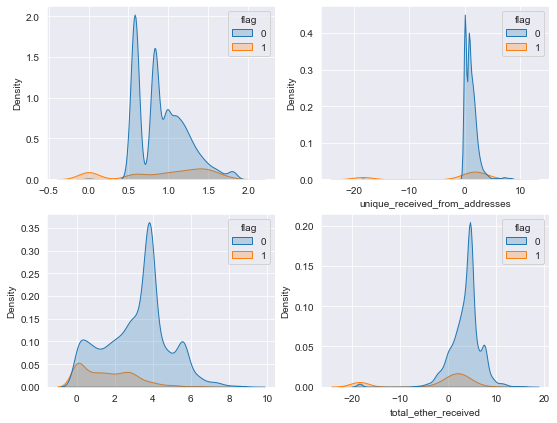

In [76]:
f, axes = plt.subplots( 2, 2, figsize=(9, 7))
sns.kdeplot(data = df, x = yeojohnson(df['unique_received_from_addresses'])[0], hue='flag', fill=True, ax = axes[0,0])
sns.kdeplot(data = df, x = yeojohnson(df['total_ether_received'])[0], hue='flag', fill=True, ax = axes[1,0])
sns.kdeplot(data = df, x = np.log(df['unique_received_from_addresses']+1e-8), hue='flag', fill=True, ax = axes[0,1])
sns.kdeplot(data = df, x = np.log(df['total_ether_received']+1e-8), hue='flag', fill=True, ax = axes[1,1])

<AxesSubplot:xlabel='time_diff_between_first_and_last_mins', ylabel='Density'>

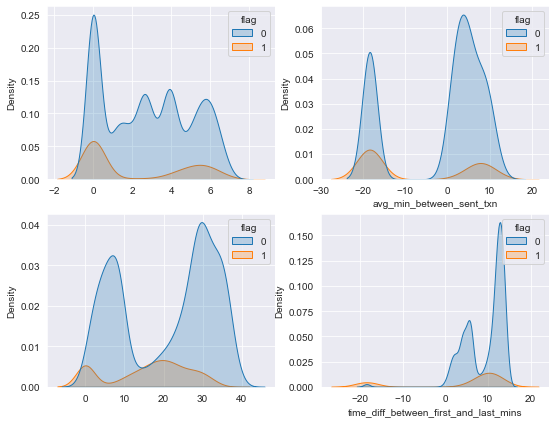

In [77]:
f, axes = plt.subplots( 2, 2, figsize=(9, 7))
sns.kdeplot(data = df, x = yeojohnson(df['avg_min_between_sent_txn'])[0], hue='flag', fill=True, ax = axes[0,0])
sns.kdeplot(data = df, x = yeojohnson(df['time_diff_between_first_and_last_mins'])[0], hue='flag', fill=True, ax = axes[1,0])
sns.kdeplot(data = df, x = np.log(df['avg_min_between_sent_txn']+1e-8), hue='flag', fill=True, ax = axes[0,1])
sns.kdeplot(data = df, x = np.log(df['time_diff_between_first_and_last_mins']+1e-8), hue='flag', fill=True, ax = axes[1,1])

In [68]:
df.nunique()

address                                  8956
flag                                        2
avg_min_between_sent_txn                 4809
avg_min_between_received_txn             5796
time_diff_between_first_and_last_mins    7256
sent_txn                                  634
received_txn                              720
number_of_created_contracts                20
unique_received_from_addresses            248
unique_sent_to_addresses                  253
min_val_received                         4422
max_val_received                         6092
avg_val_received                         6383
min_val_sent                             4418
max_val_sent                             6304
avg_val_sent                             5465
total_transactions_inc_cnts               892
total_ether_sent                         5481
total_ether_received                     6351
total_ether_balance                      5502
total_erc20_txns                          300
erc20_total_ether_received        

In [78]:
df.dtypes

address                                   object
flag                                       int64
avg_min_between_sent_txn                 float64
avg_min_between_received_txn             float64
time_diff_between_first_and_last_mins    float64
sent_txn                                   int64
received_txn                               int64
number_of_created_contracts                int64
unique_received_from_addresses             int64
unique_sent_to_addresses                   int64
min_val_received                         float64
max_val_received                         float64
avg_val_received                         float64
min_val_sent                             float64
max_val_sent                             float64
avg_val_sent                             float64
total_transactions_inc_cnts                int64
total_ether_sent                         float64
total_ether_received                     float64
total_ether_balance                      float64
total_erc20_txns    

In [79]:
df.drop(['erc20_most_rec_token_type','erc20_most_sent_token_type'],axis=1,inplace=True)
print(df.shape)

(8981, 35)


In [80]:
# First performing random forest
print('Random forest can only classify numerical columns, hence further processing needs to be done')
df_fst = df.select_dtypes(include='number')
print(df_fst.shape)
print('3 columns have been dropped')

Random forest can only classify numerical columns, hence further processing needs to be done
(8981, 34)
3 columns have been dropped


In [81]:
x = df_fst.drop('flag',axis=1)
print(x.shape)
y = df_fst['flag'] # y_column needs to be 1d
print(y.shape)

(8981, 33)
(8981,)


In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.7,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6286, 33), (2695, 33), (6286,), (2695,))

In [83]:
# TOTAL_TREES = 100
# classifier_rf = RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators=TOTAL_TREES)
# classifier_rf.fit(X_train,y_train)

In [84]:
# Hyperparameter tuning for random forest using gridsearchcv to fit the data

rf = RandomForestClassifier(random_state=42,n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

from sklearn.model_selection import GridSearchCV

In [85]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1,
                           verbose=1,
                           scoring="f1")

In [86]:
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='f1', verbose=1)

In [87]:
print(grid_search.best_score_)
rf_best = grid_search.best_estimator_
print(rf_best)

0.9152560696221511
RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)


In [88]:
from sklearn.metrics import f1_score, roc_auc_score, recall_score, accuracy_score, precision_score
rf = RandomForestClassifier(max_depth=20,min_samples_leaf=5,n_estimators=50,n_jobs=-1,random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(f1_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9238709677419356
0.9393552213057309
0.8839506172839506
0.9781076066790353
0.9675675675675676


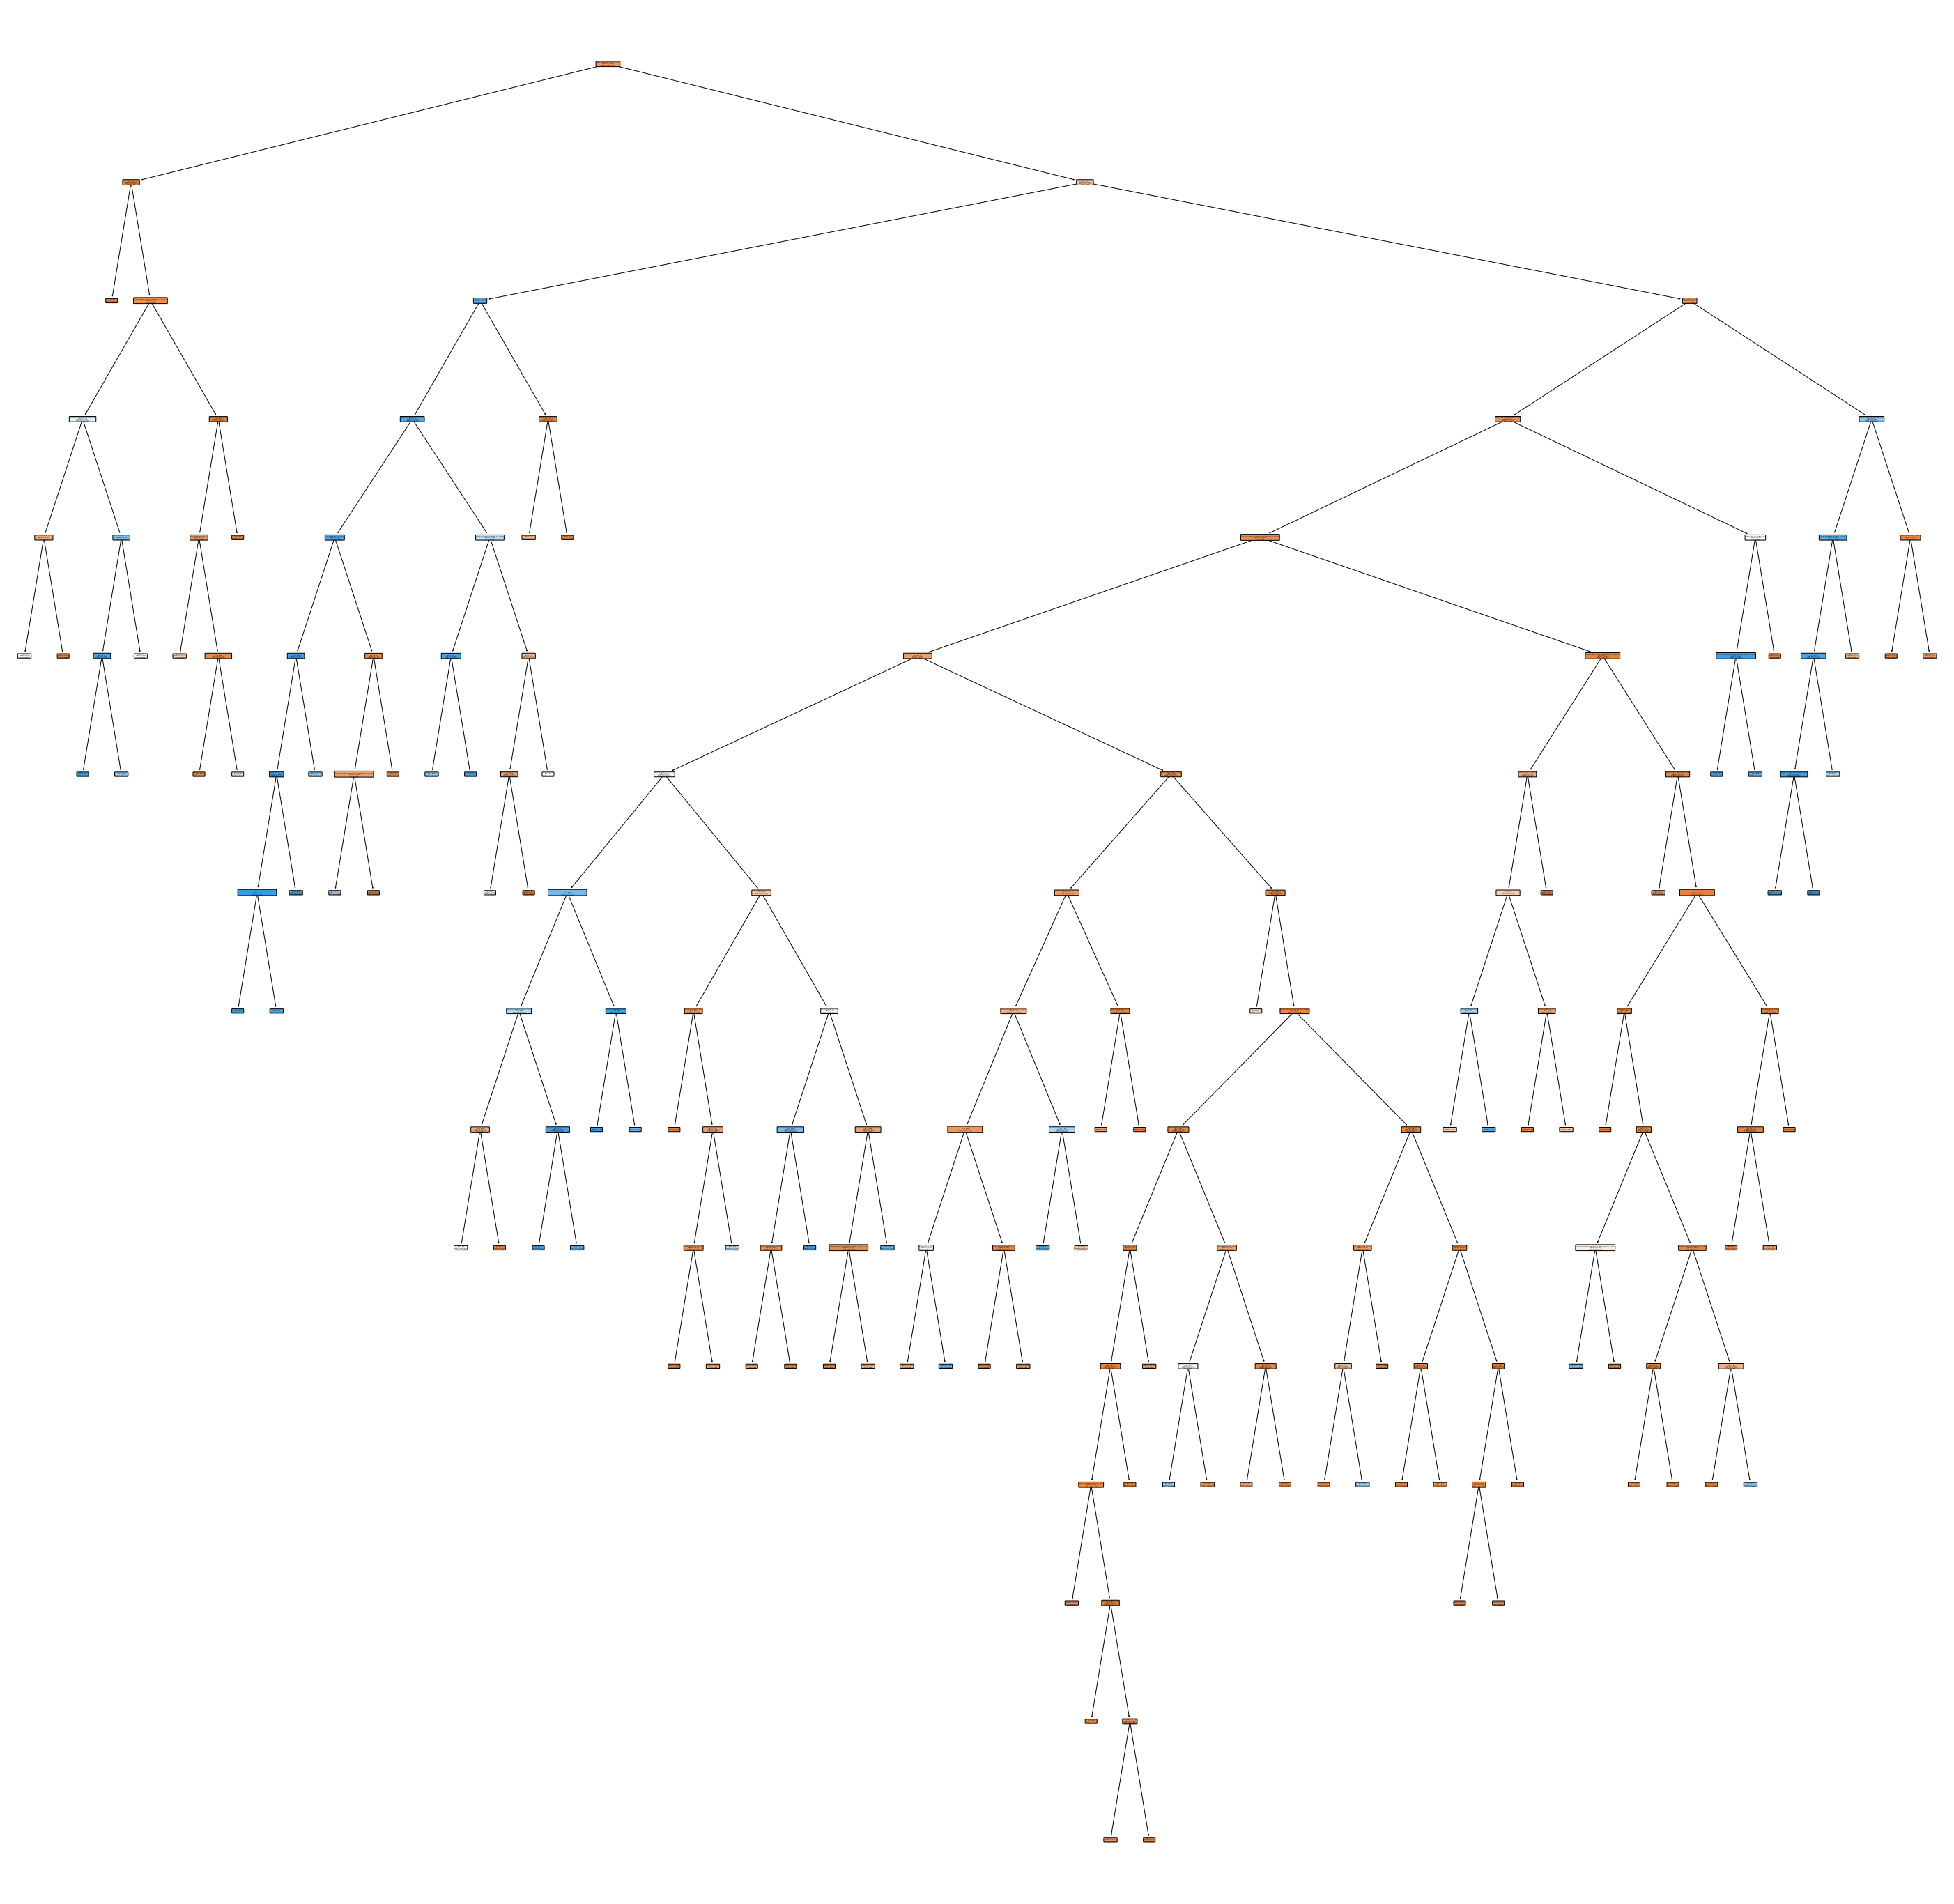

In [60]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,50))
plot_tree(rf_best.estimators_[5], feature_names = x.columns,class_names=['Fraud', "No Fraud"],filled=True,proportion=True,rounded=True,precision=2)
plt.savefig("tree.eps")

In [89]:
# sorting the date by feature importance
rf_best.feature_importances_

array([0.00733336, 0.05252212, 0.13460703, 0.01044012, 0.03085962,
       0.00461111, 0.04643785, 0.00397046, 0.00668148, 0.015791  ,
       0.02165802, 0.01983139, 0.00730844, 0.00754082, 0.05861918,
       0.0095959 , 0.03095692, 0.02277848, 0.0687906 , 0.0575174 ,
       0.00694598, 0.        , 0.00676851, 0.03446648, 0.02786123,
       0.10994462, 0.07576294, 0.03888134, 0.00631177, 0.0057081 ,
       0.00771139, 0.00971405, 0.05207228])

In [90]:
feature_imp_df = pd.DataFrame({
    "Features" : X_train.columns,
    "Importance" : rf_best.feature_importances_
})
feature_imp_df.sort_values(by="Importance",ascending=False)

,Features,Importance
2,time_diff_between_first_and_last_mins,0.134607
25,erc20_min_val_rec,0.109945
26,erc20_max_val_rec,0.075763
18,total_erc20_txns,0.068791
14,total_transactions_inc_cnts,0.058619
19,erc20_total_ether_received,0.057517
1,avg_min_between_received_txn,0.052522
32,erc20_uniq_rec_token_name,0.052072
6,unique_received_from_addresses,0.046438
27,erc20_avg_val_rec,0.038881


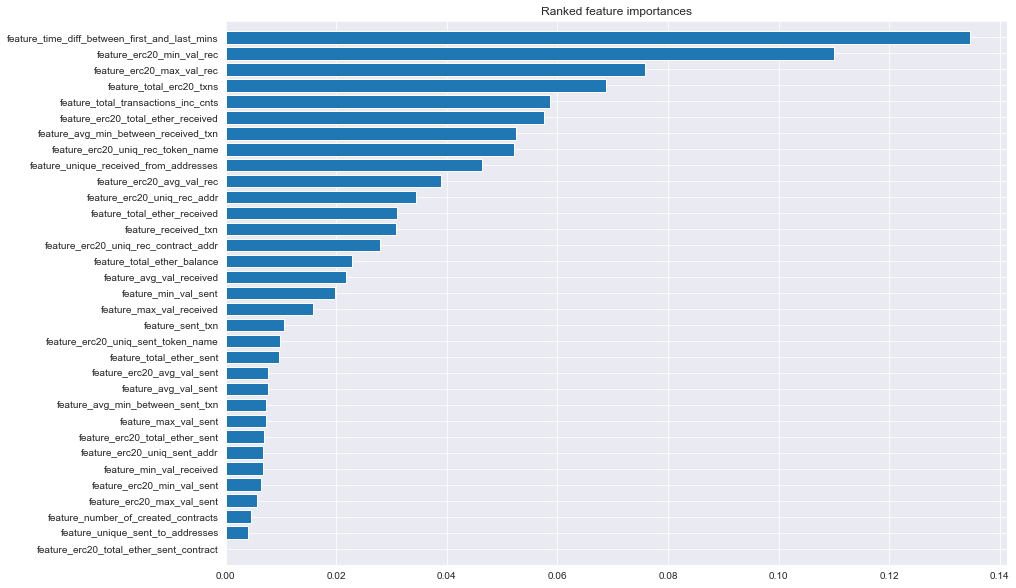

In [91]:
from matplotlib import pyplot as plt
feat_importances = rf_best.feature_importances_
indices = np.argsort(feat_importances)
# plot
columns = np.array(X_train.columns)
fig, ax = plt.subplots(figsize=(14, 10))
plt.title("Ranked feature importances")
plt.barh(range(len(feat_importances)), feat_importances[indices], align="center")
features = ['feature_{}'.format(columns[i]) for i in range(len(columns))]
plt.yticks(range(len(feat_importances)), [features[idx] for idx in indices])
plt.ylim([-1, len(feat_importances)])
plt.show();